In [79]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [80]:
# --- 1. Определяем входные и выходные переменные ---
discount = ctrl.Antecedent(np.arange(5, 51, 1), 'discount')   # 5–50 %
period = ctrl.Antecedent(np.arange(3, 37, 1), 'period')       # 3–36 месяцев
rate = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'rate')      # 0–1

In [81]:
# --- 2. Определяем функции принадлежности ---
discount['small'] = fuzz.trimf(discount.universe, [0, 5, 27.5])
discount['middle'] = fuzz.trimf(discount.universe, [5, 27.5, 50])
discount['big'] = fuzz.trimf(discount.universe, [27.5, 50, 55])

period['short'] = fuzz.gaussmf(period.universe, 3., 2.6)
period['normal'] = fuzz.gaussmf(period.universe, 18, 8)
period['long'] = fuzz.gaussmf(period.universe, 36, -2.6)

rate['bad'] = fuzz.trimf(rate.universe, [0.0, 0.0, 0.5])
rate['normal'] = fuzz.trimf(rate.universe, [0.0, 0.5, 1.])
rate['good'] = fuzz.trimf(rate.universe, [0.5, 1.0, 1.0])

In [82]:
# --- 3. Определяем правила нечеткого вывода ---
rule1 = ctrl.Rule(discount['small'] & period['short'], rate['good'])
rule2 = ctrl.Rule(~discount['small'] & period['long'], rate['bad'])
rule3 = ctrl.Rule(discount['middle'] & period['normal'], rate['normal'])
rule4 = ctrl.Rule(discount['big'] & period['short'], rate['normal'])

In [83]:
# --- 4. Создаём и симулируем систему нечеткого вывода ---
investment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
investment_sim = ctrl.ControlSystemSimulation(investment_ctrl)

In [84]:
# Пример ввода данных
investment_sim.input['discount'] = 15   # ставка дисконтирования
investment_sim.input['period'] = 10     # период окупаемости

In [85]:
# --- 5. Выполняем нечеткий вывод ---
investment_sim.compute()
print(f"Рейтинг инвестиционной привлекательности: {investment_sim.output['rate']:.3f}")

Рейтинг инвестиционной привлекательности: 0.500


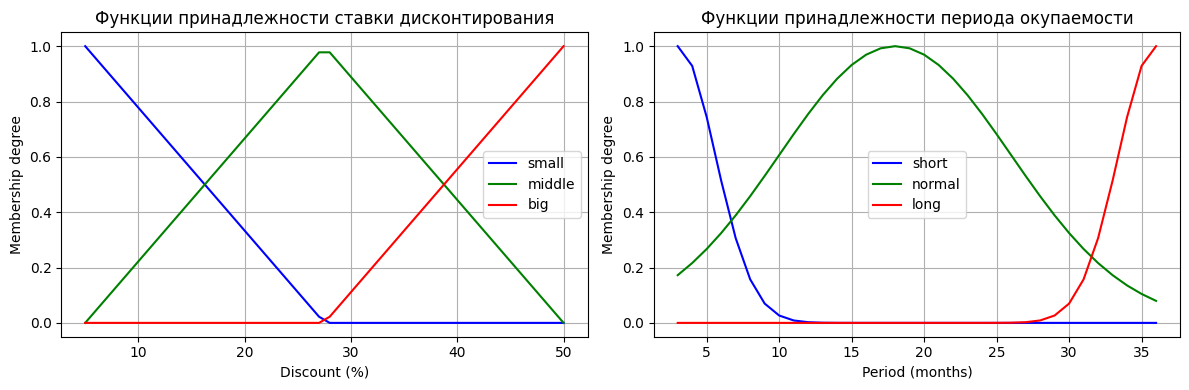

In [86]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# --- Discount ---
axes[0].plot(discount.universe, discount.terms['small'].mf, 'b', linewidth=1.5, label='small')
axes[0].plot(discount.universe, discount.terms['middle'].mf, 'g', linewidth=1.5, label='middle')
axes[0].plot(discount.universe, discount.terms['big'].mf, 'r', linewidth=1.5, label='big')
axes[0].set_title('Функции принадлежности ставки дисконтирования')
axes[0].set_xlabel('Discount (%)')
axes[0].set_ylabel('Membership degree')
axes[0].legend()
axes[0].grid(True)

# --- Period ---
axes[1].plot(period.universe, period.terms['short'].mf, 'b', linewidth=1.5, label='short')
axes[1].plot(period.universe, period.terms['normal'].mf, 'g', linewidth=1.5, label='normal')
axes[1].plot(period.universe, period.terms['long'].mf, 'r', linewidth=1.5, label='long')
axes[1].set_title('Функции принадлежности периода окупаемости')
axes[1].set_xlabel('Period (months)')
axes[1].set_ylabel('Membership degree')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


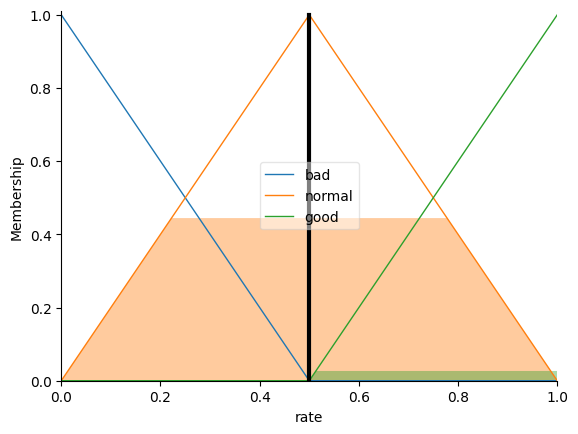

In [87]:
# --- 6. Визуализация ---
rate.view(sim=investment_sim)
plt.show()

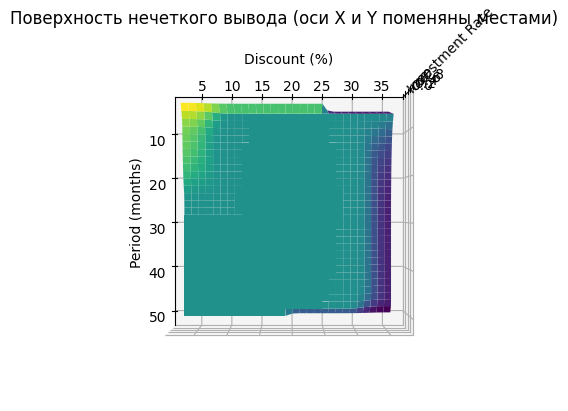

In [88]:
discount_range = np.linspace(5, 50, 30)
period_range = np.linspace(3, 36, 30)
y, x = np.meshgrid(discount_range, period_range)  # поменяли порядок!
z = np.zeros_like(x)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        investment_sim.input['discount'] = y[i, j]  # теперь y — discount
        investment_sim.input['period'] = x[i, j]    # а x — period
        investment_sim.compute()
        z[i, j] = investment_sim.output['rate']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(y, x, z, cmap='viridis')
ax.set_xlabel('Period (months)')
ax.set_ylabel('Discount (%)')
ax.set_zlabel('Investment Rate')
ax.set_title('Поверхность нечеткого вывода (оси X и Y поменяны местами)')
ax.view_init(elev=90, azim=0)
plt.show()

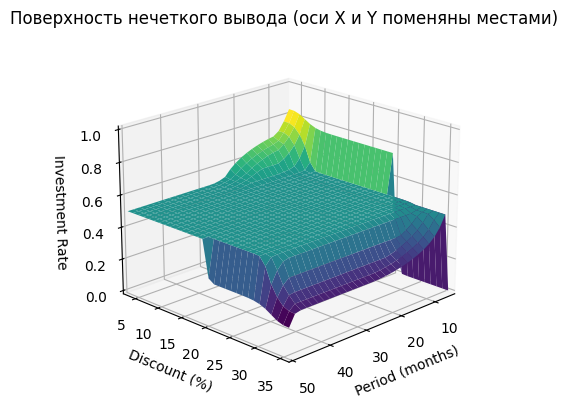

In [89]:
discount_range = np.linspace(5, 50, 30)
period_range = np.linspace(3, 36, 30)
y, x = np.meshgrid(discount_range, period_range)  # поменяли порядок!
z = np.zeros_like(x)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        investment_sim.input['discount'] = y[i, j]  # теперь y — discount
        investment_sim.input['period'] = x[i, j]    # а x — period
        investment_sim.compute()
        z[i, j] = investment_sim.output['rate']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(y, x, z, cmap='viridis')
ax.set_xlabel('Period (months)')
ax.set_ylabel('Discount (%)')
ax.set_zlabel('Investment Rate')
ax.set_title('Поверхность нечеткого вывода (оси X и Y поменяны местами)')
ax.view_init(elev=20, azim=45)
ax.set_xlim(5, 50)      # диапазон по оси X (discount)
ax.set_ylim(3, 36)      # диапазон по оси Y (period)
ax.set_zlim(0, 1)       # диапазон по оси Z (rate)
plt.show()